In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn import tree
from sklearn.metrics import r2_score

In [78]:
# read data
df = pd.read_csv('portland.csv', header=None)
df.columns = (['Size','Bedroom','Price'])
df.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


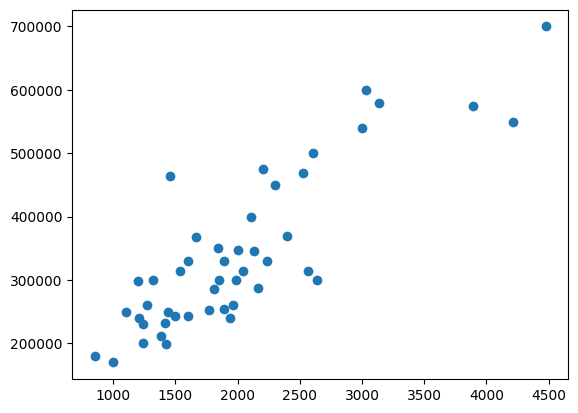

In [79]:
plt.plot(df.Size, df.Price, 'o')
plt.show()

In [80]:
X = df[['Size', 'Bedroom']]
y = df['Price']

In [81]:
# train model
reg = LinearRegression().fit(X,y,)

In [82]:
# intercept and coefficient
print(reg.intercept_)

89597.90954279754


In [83]:
print(reg.coef_)

[  139.21067402 -8738.01911233]


In [84]:
y_predict = reg.predict(X)
linear_reg_r2 = r2_score(y, y_predict)
linear_reg_r2

0.7329450180289142

### For how much should our friend sell a 3,500 square foot house?

In [85]:
# reg.intercept_ + 3500*reg.coef_[0] + 4*reg.coef_[1]
reg.predict([[3500,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([541883.19215518])

### Polynomial regression

In [86]:
poly = PolynomialFeatures(degree=3) #X^3 -> x^0, x^1, x^2, x^3
X_poly = poly.fit_transform(X)
X_poly[:5]

array([[1.00000000e+00, 2.10400000e+03, 3.00000000e+00, 4.42681600e+06,
        6.31200000e+03, 9.00000000e+00, 9.31402086e+09, 1.32804480e+07,
        1.89360000e+04, 2.70000000e+01],
       [1.00000000e+00, 1.60000000e+03, 3.00000000e+00, 2.56000000e+06,
        4.80000000e+03, 9.00000000e+00, 4.09600000e+09, 7.68000000e+06,
        1.44000000e+04, 2.70000000e+01],
       [1.00000000e+00, 2.40000000e+03, 3.00000000e+00, 5.76000000e+06,
        7.20000000e+03, 9.00000000e+00, 1.38240000e+10, 1.72800000e+07,
        2.16000000e+04, 2.70000000e+01],
       [1.00000000e+00, 1.41600000e+03, 2.00000000e+00, 2.00505600e+06,
        2.83200000e+03, 4.00000000e+00, 2.83915930e+09, 4.01011200e+06,
        5.66400000e+03, 8.00000000e+00],
       [1.00000000e+00, 3.00000000e+03, 4.00000000e+00, 9.00000000e+06,
        1.20000000e+04, 1.60000000e+01, 2.70000000e+10, 3.60000000e+07,
        4.80000000e+04, 6.40000000e+01]])

In [87]:
# train model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [88]:
print(model.intercept_)
print(model.coef_)

-22271.376454580983
[ 0.00000000e+00  3.91558122e+01  1.54862068e+05  2.67038211e-01
 -3.26702734e+02  6.67279964e+04 -2.16721404e-05 -3.85899101e-02
  8.36292254e+01 -2.78260510e+04]


In [89]:
y_predict = model.predict(X_poly)
poly_reg_r2 = r2_score(y, y_predict)
poly_reg_r2

0.7788762778666665

### For how much should our friend sell a 3,500 square foot house?

In [90]:
predict_data = np.array([[3500,4]])
predict_data_poly = poly.transform(predict_data)
predict_data_poly

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.0000e+00, 3.5000e+03, 4.0000e+00, 1.2250e+07, 1.4000e+04,
        1.6000e+01, 4.2875e+10, 4.9000e+07, 5.6000e+04, 6.4000e+01]])

In [91]:
model.predict(predict_data_poly)

array([581520.72149267])

### Decision Tree

In [92]:
model = DecisionTreeRegressor(random_state=111, min_samples_split=7)
model.fit(X,y)

DecisionTreeRegressor(min_samples_split=7, random_state=111)

In [93]:
y_predict = model.predict(X)
tree_reg_r2 = r2_score(y, y_predict)
tree_reg_r2

0.903909819951324

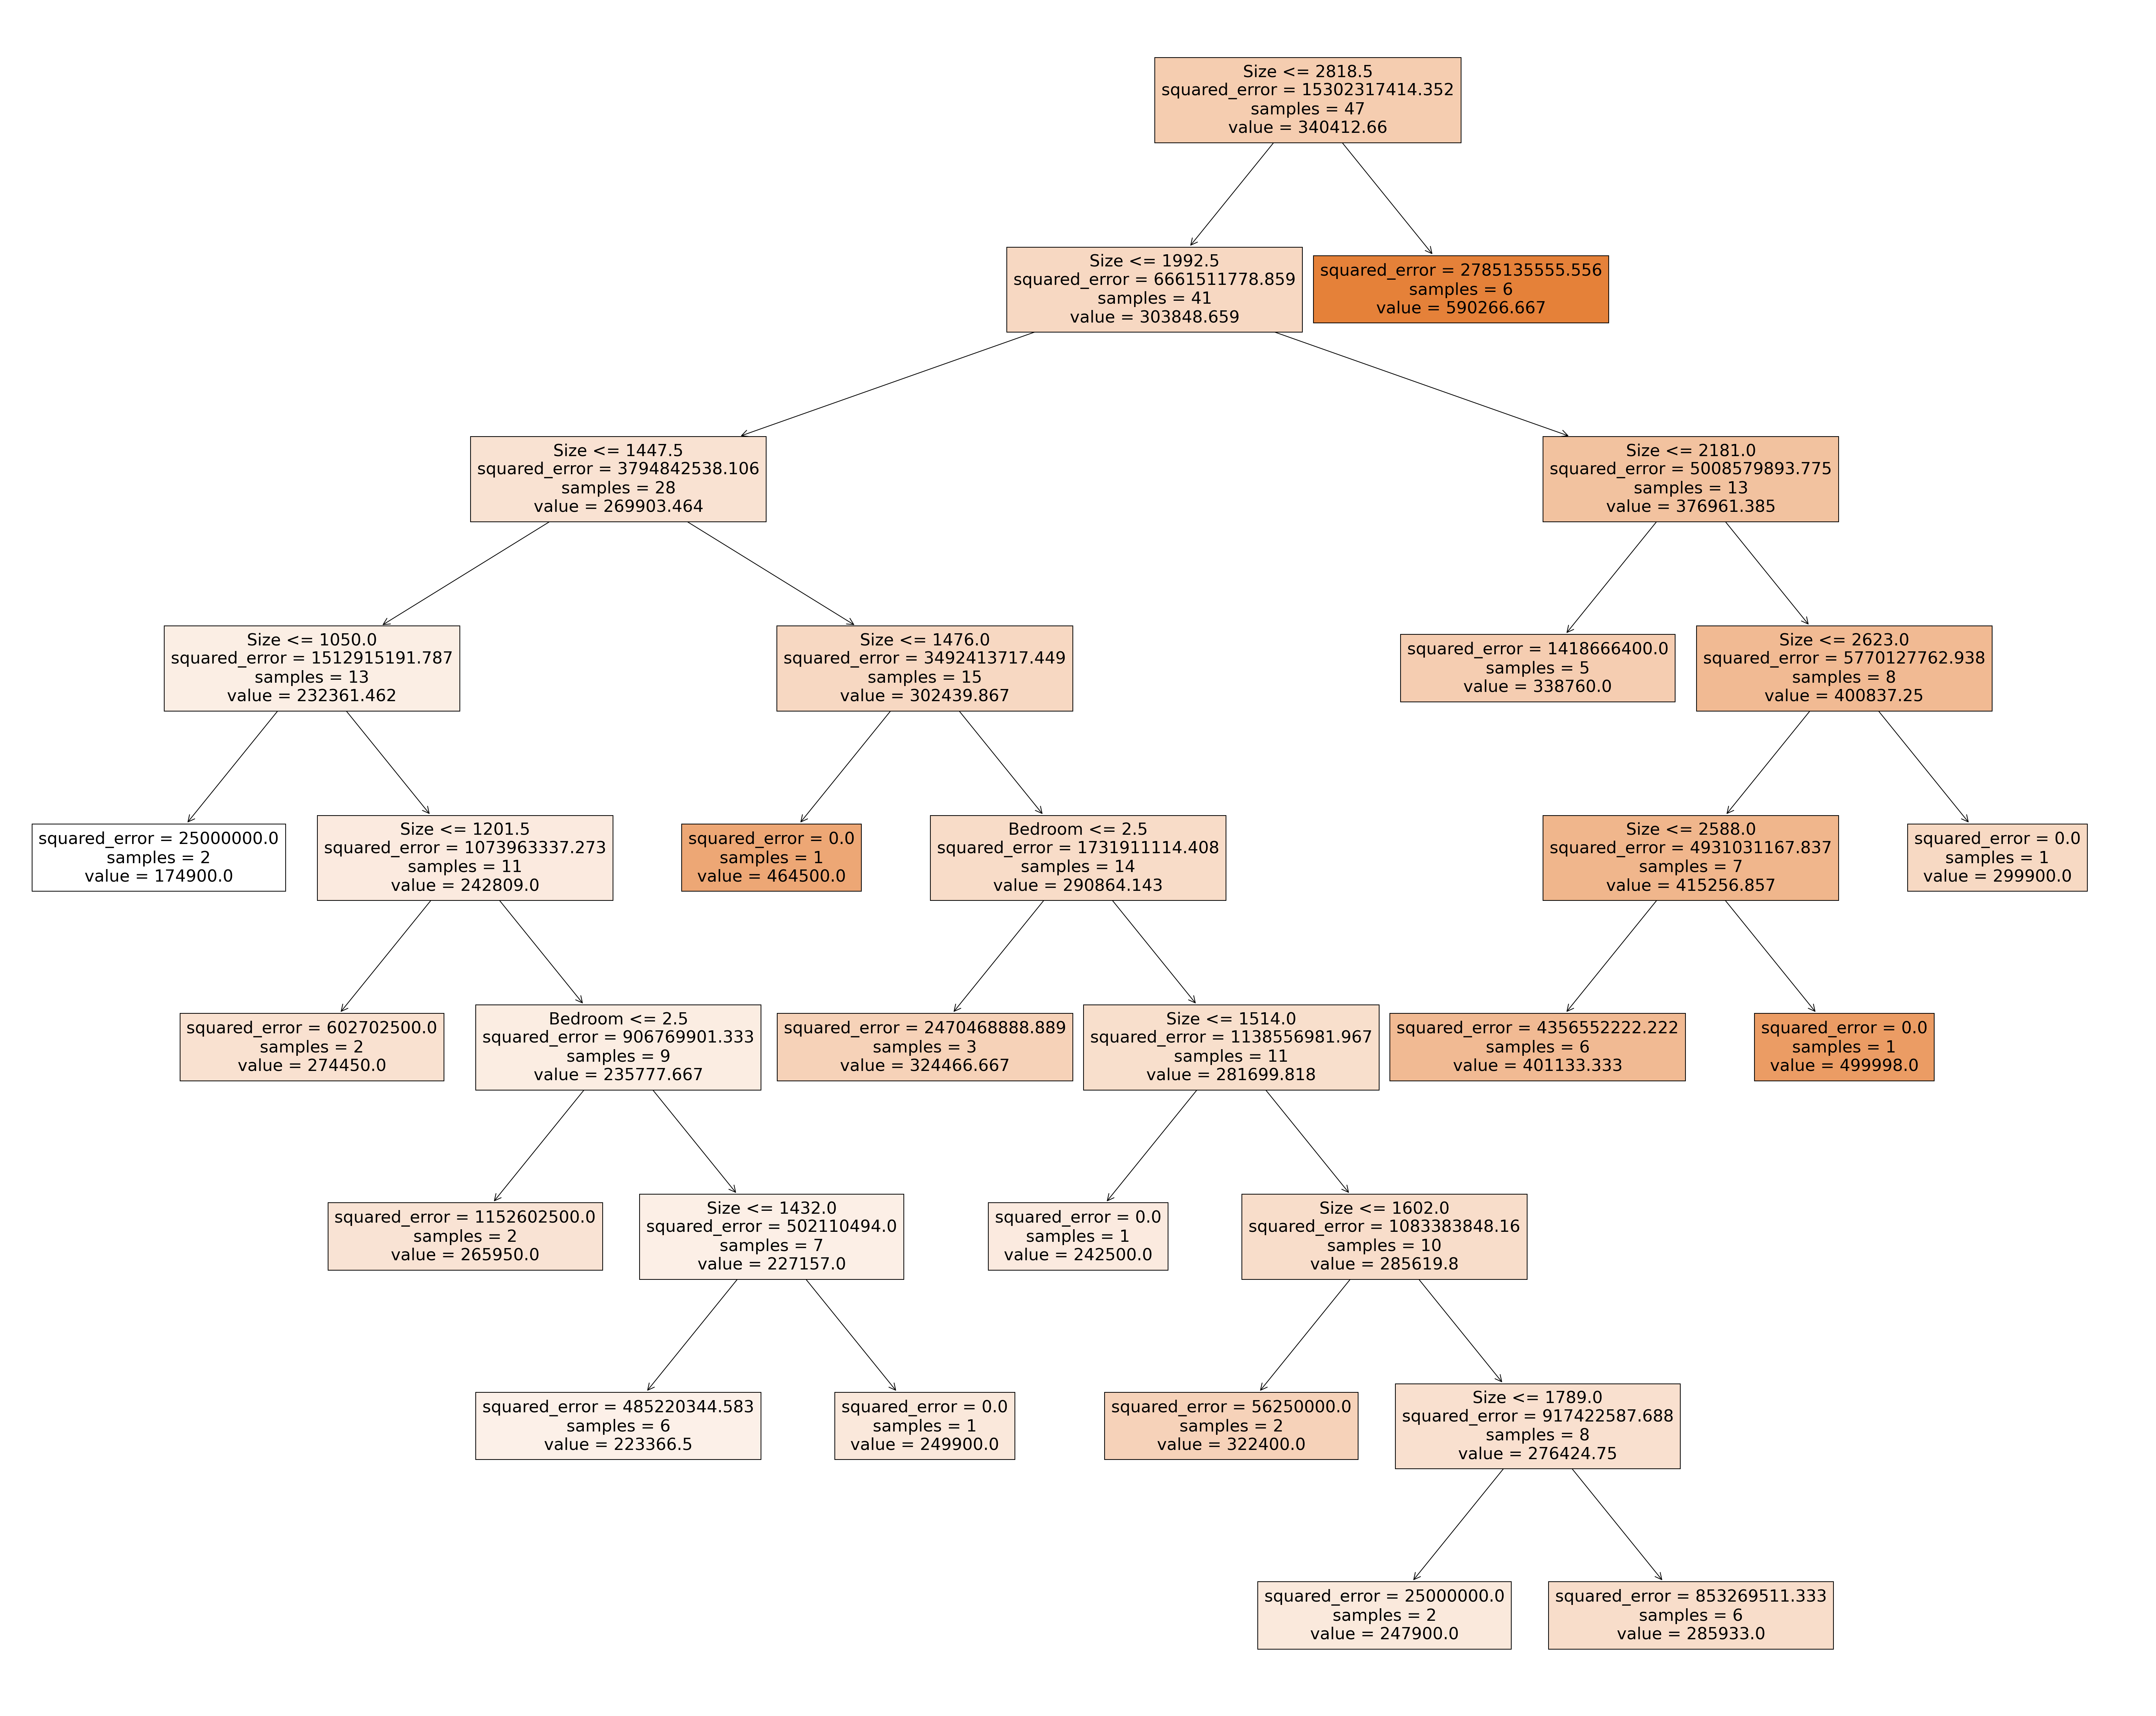

In [94]:
#Draw tree
fig = plt.figure(figsize=(50,40), dpi=150)
tree_plot = tree.plot_tree(model, feature_names=X.columns, filled=True)

In [95]:
print(f"Linear regression R2 score: {linear_reg_r2}. ")
print(f"Polynomial regression R2 score: {poly_reg_r2}. ")
print(f"Decision tree R2 score: {tree_reg_r2}. ")

Linear regression R2 score: 0.7329450180289142. 
Polynomial regression R2 score: 0.7788762778666665. 
Decision tree R2 score: 0.903909819951324. 


In [96]:
# Feature Importance
feat_importance = model.tree_.compute_feature_importances(normalize=False)
feat_importance = pd.concat([X.columns.to_series().reset_index(drop=True), pd.Series(feat_importance)], axis=1)
feat_importance = feat_importance.sort_values(feat_importance.columns[1], ascending = False)
feat_importance

,0,1
0,Size,1.369038e+10
1,Bedroom,1.415356e+08


### Model evaluation metrics

In [97]:
y_predict = model.predict(X)

In [98]:
# R2 - what% y our model translates?
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.903909819951324

In [99]:
# MAE - average prediction error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_predict)

28134.205673758857

In [100]:
# MAPE - average error in percentage terms
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y, y_predict)

0.08346371355455895

In [101]:
# MSE - a metric that penalizes large errors
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predict)

1470402435.507092

In [102]:
# RMSE - same metric as MSE but under the square root
mean_squared_error(y, y_predict, squared=False)

38345.82683300872

### Splitting data to train and test dataset

In [103]:
X = df[['Size', 'Bedroom']]
y = df['Price']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=111, shuffle=False)

In [105]:
model = DecisionTreeRegressor(random_state=111, min_samples_split=7, max_depth = 5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=7, random_state=111)

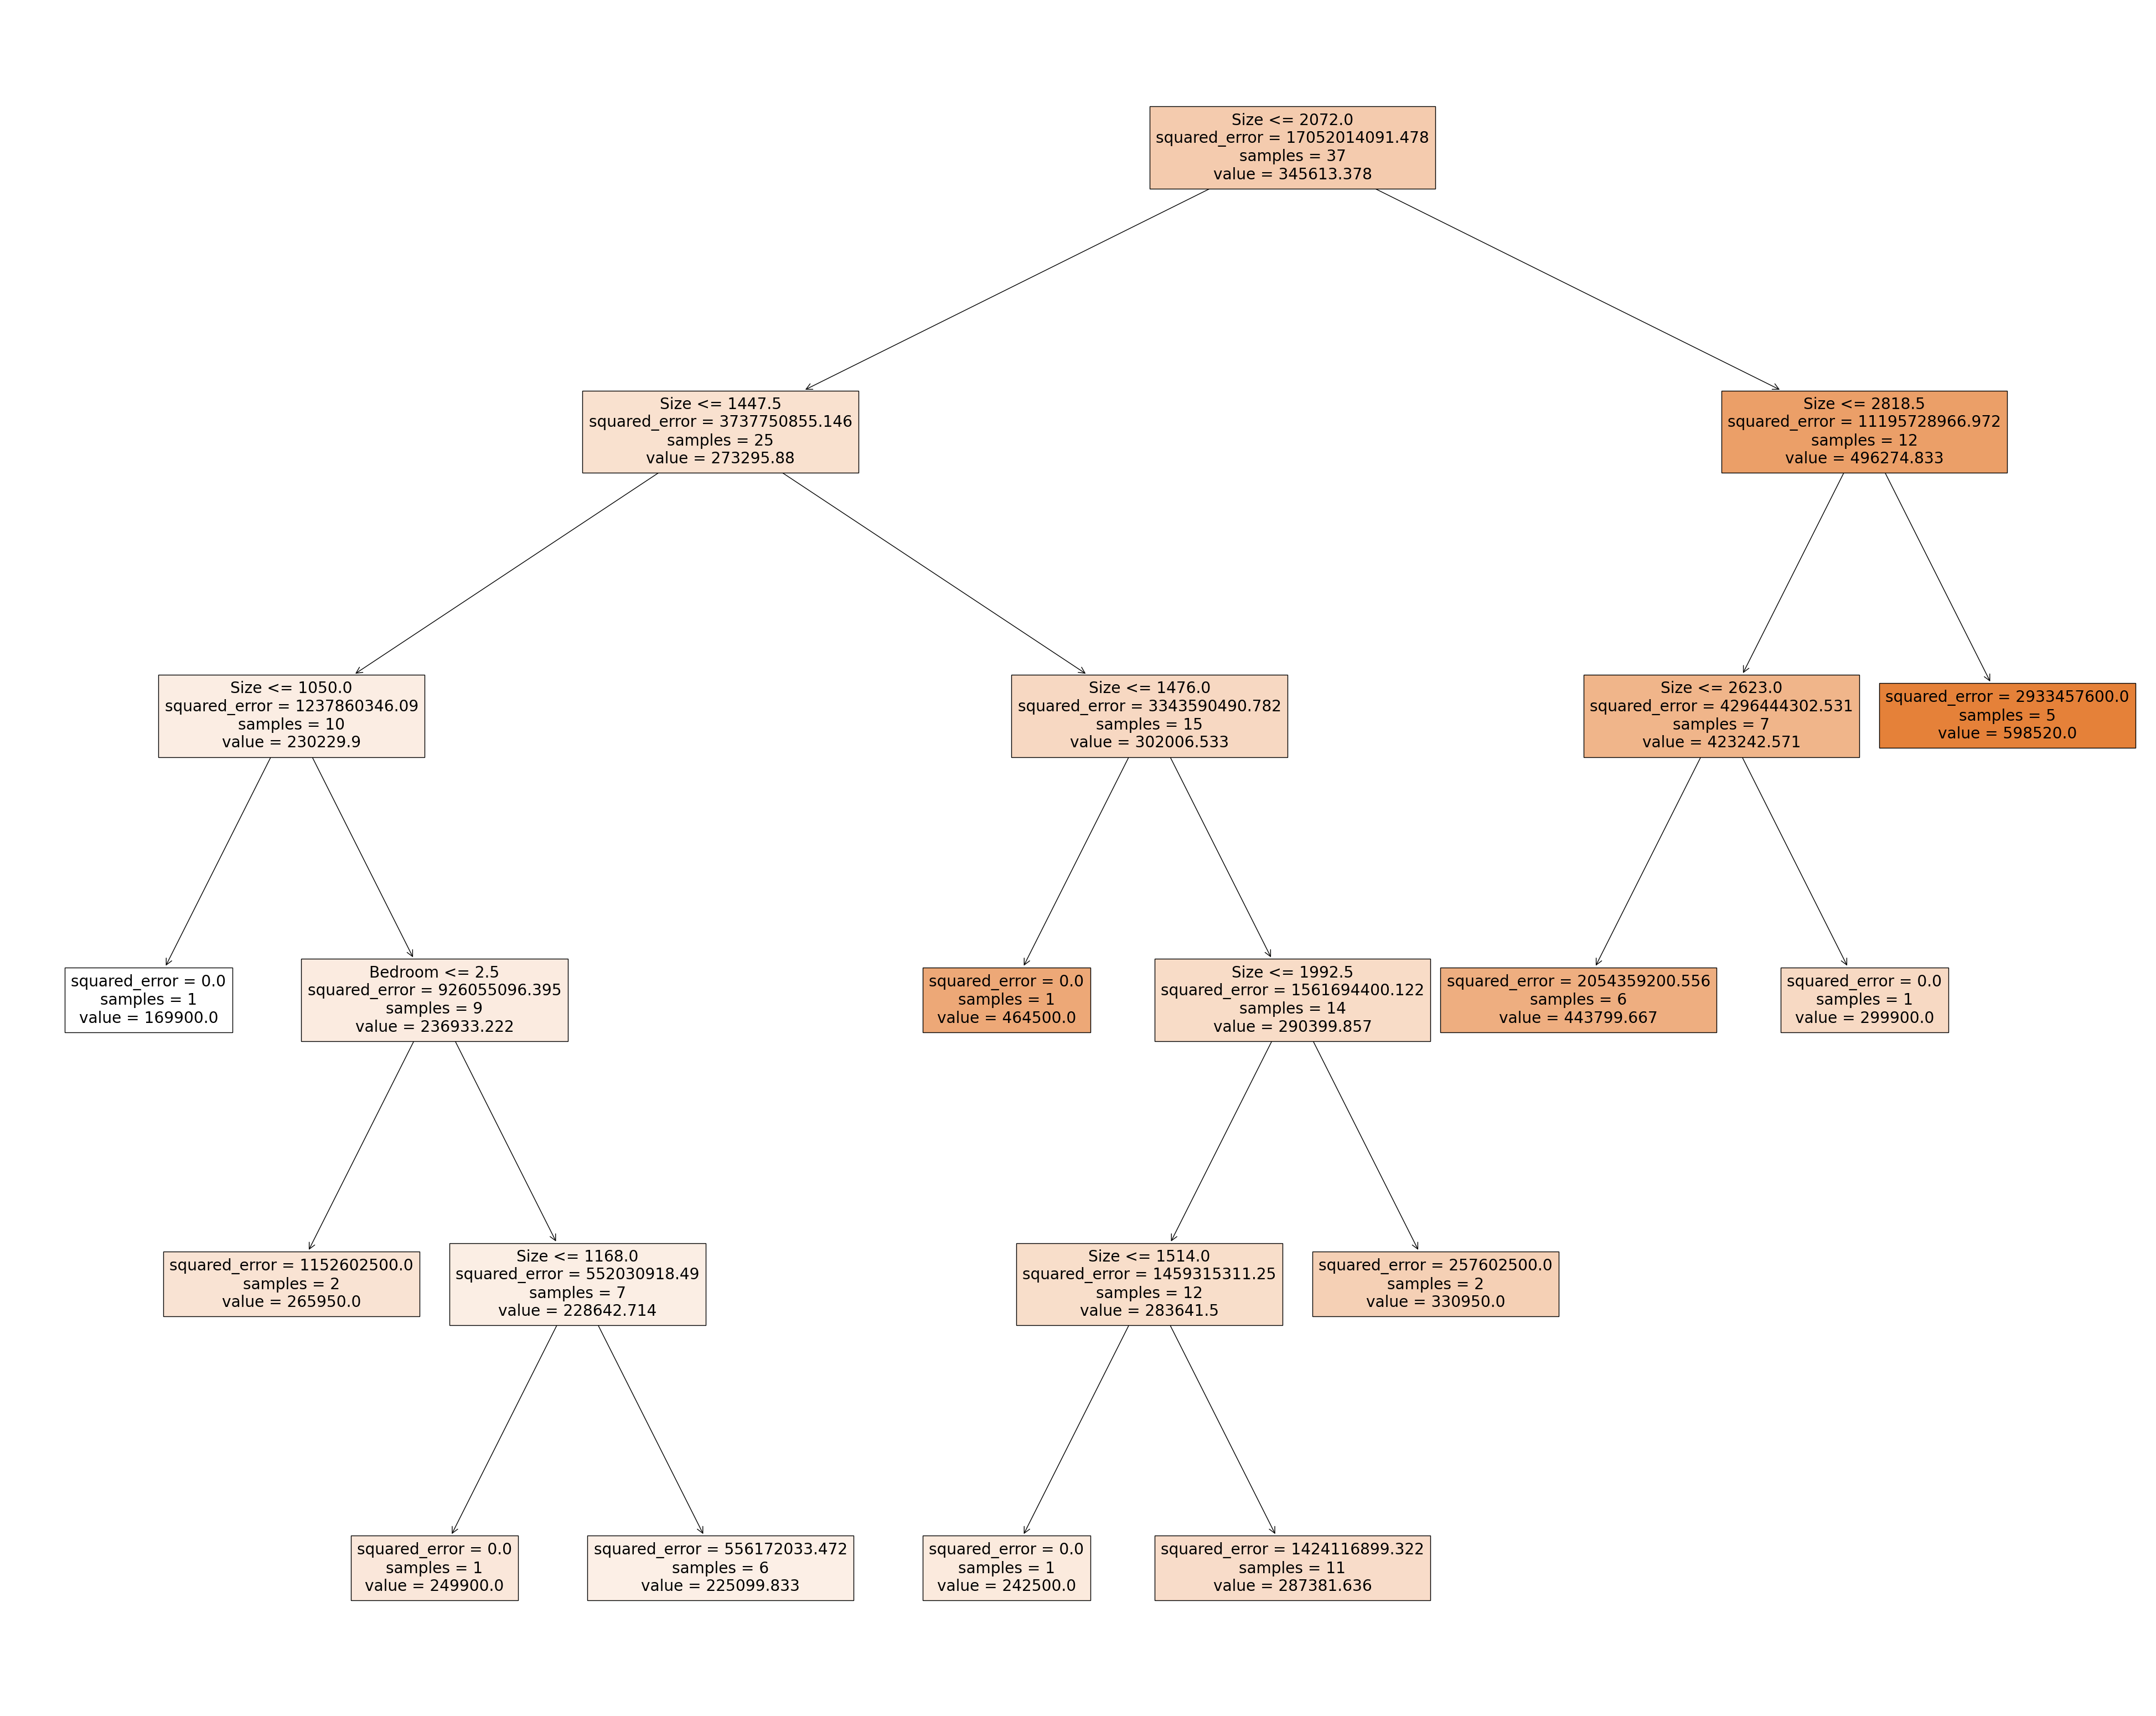

In [106]:
# Drawing tree
fig = plt.figure(figsize=(50,40), dpi=100)
tree_wykres = tree.plot_tree(model,feature_names=X.columns, filled=True)

In [107]:
# Checking how our model works on the data it was trained on
y_predict = model.predict(X_train)
print(r2_score(y_train, y_predict))
print(mean_absolute_error(y_train, y_predict))

0.9226275574302069
28251.386568386562


In [108]:
# Checking how our model works on data it has never seen
y_predict_test = model.predict(X_test)
print(r2_score(y_test, y_predict_test))
print(mean_absolute_error(y_test, y_predict_test))

0.05329589451797645
74075.57272727272
